![Sleep Health and Lifestyle Banner](banner_image.png)
# Introduction
Sleep health is a vital component of overall well-being, influencing physical, mental, and emotional health. Poor sleep quality or duration can lead to various disorders, including insomnia and sleep apnea, which in turn affect cardiovascular health and daily functioning. Understanding the factors contributing to sleep disorders is crucial for early detection and intervention.

This project leverages a synthetic dataset containing sleep, cardiovascular, and lifestyle metrics of approximately 400 fictive individuals. By analysing these factors, we aim to develop a predictive model that identifies potential sleep disorders, such as insomnia or sleep apnea, based on other attributes in the dataset. This solution is especially relevant for industries like health insurance, where risk stratification can guide premium pricing strategies.

---

# Background
As a consultant for a health insurance company, you have been tasked with identifying potential clients who might have sleep disorders. Sleep disorders like insomnia and sleep apnoea not only impact individual health but also influence insurance risk assessments. By automating this identification process, the company aims to optimise premium calculations and offer tailored insurance plans.

---

# Purpose of the Project
The primary purpose of this project is to assist a health insurance company in assessing potential risks associated with sleep disorders. This involves analysing various lifestyle and health metrics to derive insights that can influence insurance policy decisions.

---

# Objective
The primary objective is to construct a machine learning classifier that predicts the presence of a sleep disorder ("None," "Insomnia," or "Sleep Apnea") based on the other columns in the dataset. The model will be evaluated on its ability to accurately and reliably identify individuals with sleep disorders.

Specific goals include:
- Data preprocessing and exploratory analysis to uncover trends and correlations.
- Feature engineering and selection to optimise model performance.
- Model training and evaluation using appropriate classification algorithms.
- Interpretation of model outputs to provide actionable insights.

---

# Deliverables
1. A detailed exploratory data analysis (EDA) report highlighting key trends and insights.
2. A machine learning pipeline for preprocessing, training, and evaluating the classifier.
3. A well-documented Python script or Jupyter Notebook containing the entire workflow.
4. A summary report discussing findings, model performance, and potential applications.

---

# Tools and Techniques
To achieve the objectives, we will use:
- **Programming Language**: Python
- **Libraries**: pandas, numpy, matplotlib, seaborn, scikit-learn
- **Machine Learning Algorithms**: Logistic Regression, Random Forests, Support Vector Machine, KNN  etc.
- **Evaluation Metrics**: Precision, Recall, F1-macro

This project offers an excellent opportunity to apply machine learning techniques to a real-world healthcare scenario, addressing an issue of growing significance.

---

# Data Overview

- `Person ID`
- `Gender`
- `Age`
- `Occupation`
- `Sleep Duration`: Average number of hours of sleep per day
- `Quality of Sleep`: A subjective rating on a 1-10 scale
- `Physical Activity Level`: Average number of minutes the person engages in physical activity daily
- `Stress Level`: A subjective rating on a 1-10 scale
- `BMI Category`
- `Blood Pressure`: Indicated as systolic pressure over diastolic pressure
- `Heart Rate`: In beats per minute
- `Daily Steps`
- `Sleep Disorder`: One of `None`, `Insomnia` or `Sleep Apnea`

Source: [Kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/)


In [1]:
# Packages needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from IPython.display import Markdown, display
from scipy.stats import f_oneway, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.feature_selection import chi2, f_classif, RFE
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
import shap
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pickle
import os

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Reading the data
df = pd.read_csv('data.csv', na_values=[], keep_default_na=False)
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Person ID,374.0,NaN,NaN,NaN,187.5,108.108742,1.0,94.25,187.5,280.75,374.0
Gender,374,2,Male,189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,374.0,NaN,NaN,NaN,42.184492,8.673133,27.0,35.25,43.0,50.0,59.0
Occupation,374,11,Nurse,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sleep Duration,374.0,NaN,NaN,NaN,7.132086,0.795657,5.8,6.4,7.2,7.8,8.5
Quality of Sleep,374.0,NaN,NaN,NaN,7.312834,1.196956,4.0,6.0,7.0,8.0,9.0
Physical Activity Level,374.0,NaN,NaN,NaN,59.171123,20.830804,30.0,45.0,60.0,75.0,90.0
Stress Level,374.0,NaN,NaN,NaN,5.385027,1.774526,3.0,4.0,5.0,7.0,8.0
BMI Category,374,4,Normal,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood Pressure,374,25,130/85,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Checking for null values
df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [5]:
# Observing the target variable
df['Sleep Disorder'].value_counts()/len(df) *100

Sleep Disorder
None           58.556150
Sleep Apnea    20.855615
Insomnia       20.588235
Name: count, dtype: float64

In [6]:
# Data transformation
# Function to categorise blood pressure
def categorise_bp(bp):
    # Split systolic and diastolic from the "Blood Pressure" string
    systolic, diastolic = map(int, bp.split('/'))

    # Categorisation based on medical thresholds
    if systolic < 90 or diastolic < 60:
        return 'Low'
    elif (90 <= systolic < 120) and (60 <= diastolic < 80):
        return 'Normal'
    elif 120 <= systolic < 130 and diastolic < 80:
        return 'Elevated'
    elif (130 <= systolic <= 139) or (80 <= diastolic <= 89):
        return 'High BP (Stage 1)'
    elif systolic >= 140 or diastolic >= 90:
        return 'High BP (Stage 2)'
    else:
        return 'Unknown'

# Apply the categorisation function
df['BP Category'] = df['Blood Pressure'].apply(categorise_bp)

# Mapping sleeping disorders to 0 and 1
sleep_disorder_map = {'None': 1,
                      'Insomnia': 2,
                      'Sleep Apnea': 3}

# Due to the size and distribution of the data, this will be a binary classification project
df['target'] = df['Sleep Disorder'].map(sleep_disorder_map).astype("category")

# Blood Pressure column needs to be split to represent diastole and systole
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)


# Dropping the Person ID column
df.drop(columns=['Person ID', 'Blood Pressure'], inplace= True)

df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BP Category,target,Systolic BP,Diastolic BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,High BP (Stage 1),1,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,High BP (Stage 1),1,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,High BP (Stage 1),1,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,High BP (Stage 2),3,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,High BP (Stage 2),3,140,90


# Exploratory Data Analysis

Which factors could contribute to a sleep disorder?

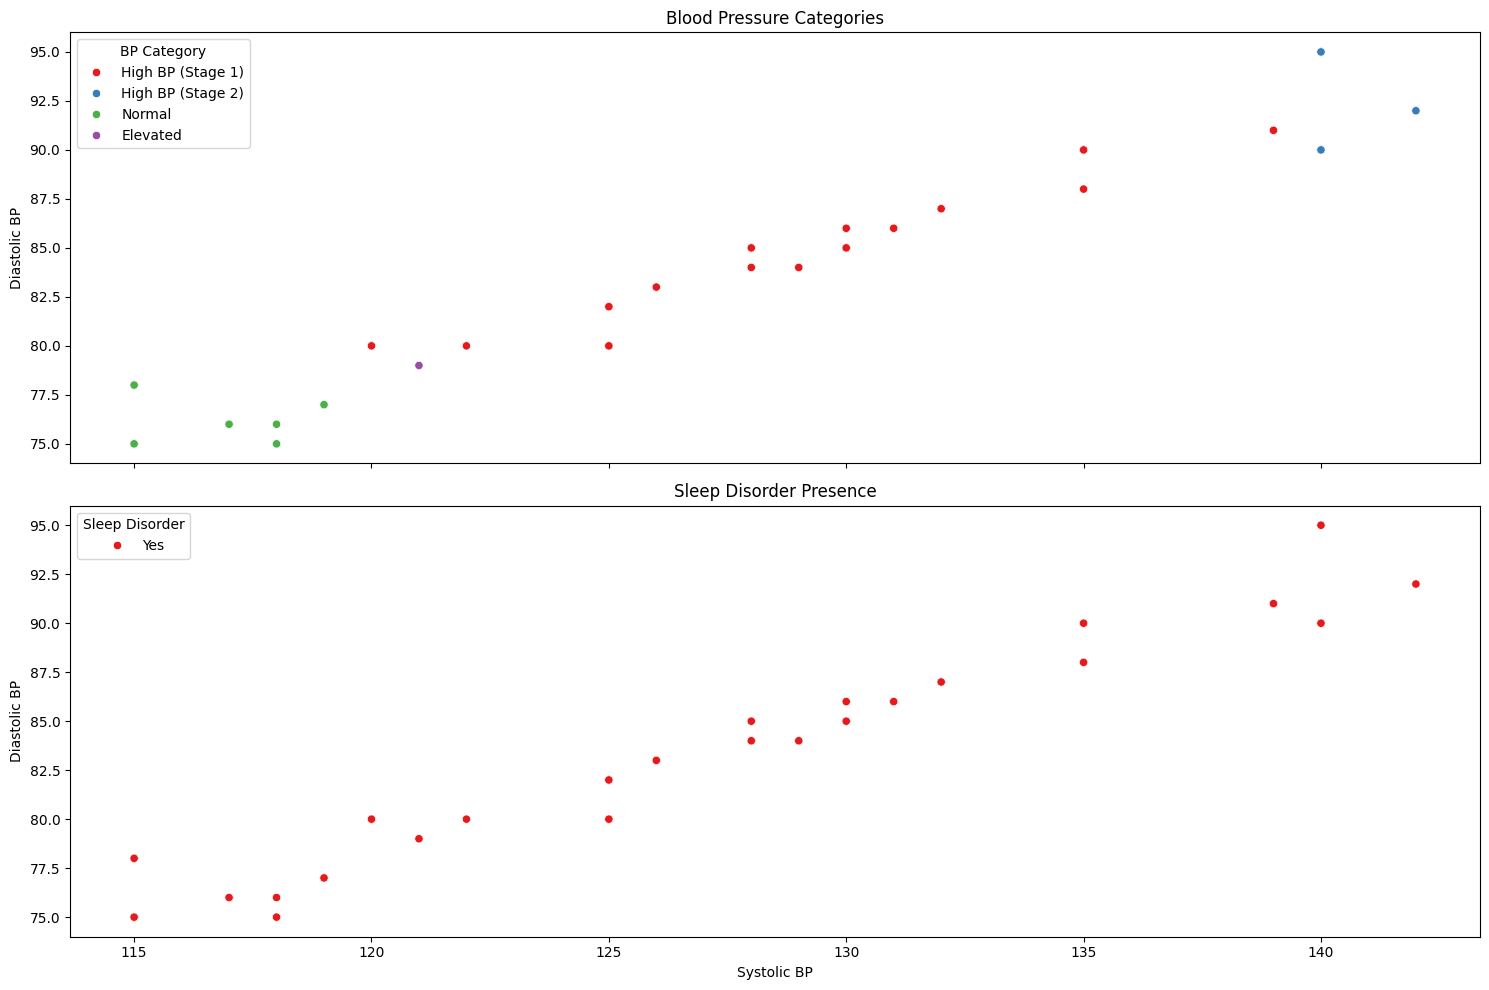

RESULT: From observation, the higher the blood pressure of the individual, the higher the chances of the individual to have a sleeping disorder.

In [7]:
# Does blood pressure cause sleeping disorder?

fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True, sharey=True)

# Subplot 1: Hue = BP Category
sns.scatterplot(
    x='Systolic BP',
    y='Diastolic BP',
    data=df,
    hue='BP Category',
    palette='Set1',
    ax=axes[0]
)
axes[0].set_title('Blood Pressure Categories')

# Subplot 2: Hue = Has sleep disorder?
scatter = sns.scatterplot(
    x='Systolic BP',
    y='Diastolic BP',
    data=df,
    hue=df['Sleep Disorder'].apply(lambda x: 'Yes' if x != "NaN" else 'No'),
    palette='Set1',
    ax=axes[1]
)
axes[1].set_title('Sleep Disorder Presence')

# Move the hue label to the top left corner
legend = scatter.legend(loc='upper left', title='Sleep Disorder')

plt.tight_layout()
plt.show()

display(Markdown("RESULT: From observation, the higher the blood pressure of the individual, the higher the chances of the individual to have a sleeping disorder."))


# Does heart rate affect an individual's sleep health?

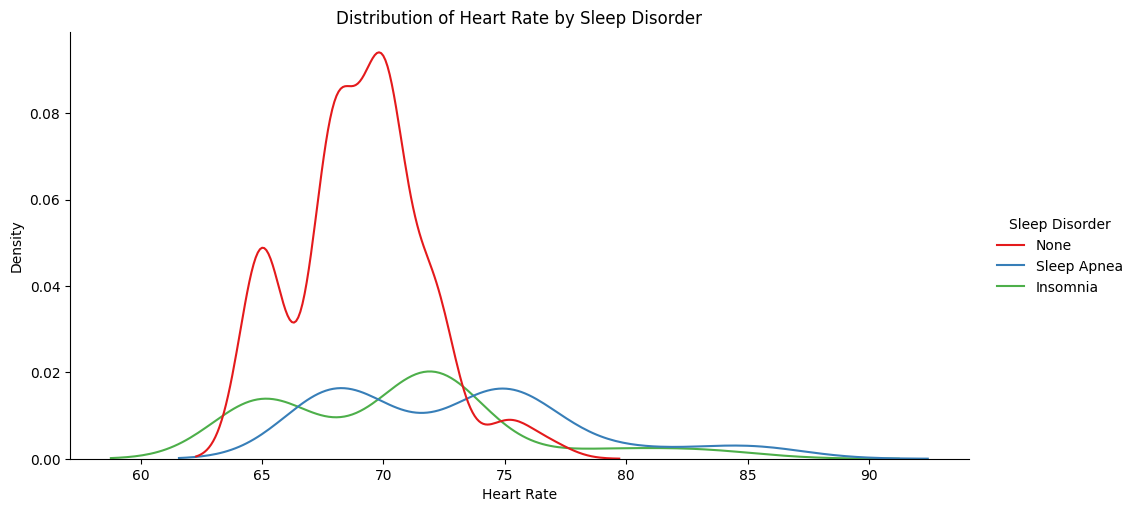


Post hoc test for Daily Steps:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2   1.4493 0.0123 0.2579 2.6406   True
     1      3   4.0715    0.0 2.8858 5.2572   True
     2      3   2.6222 0.0001 1.1777 4.0668   True
--------------------------------------------------


**KEY**: {'None': 1, 'Insomnia': 2, 'Sleep Apnea': 3}

## RESULT:
 Individuals **`without sleep disorders`** have a stable heart rate around **70 bpm**, while **`Sleep Apnea`** is linked to **higher heart rates**, significantly above both **Insomnia (+2.62 bpm)** and **healthy individuals (+4.07 bpm)**. **`Insomniac`** have a slightly **lower heart rate (-1.45 bpm)** than those without sleep disorders. This confirms a strong link between **heart rate irregularities and sleep disorders**, with **Sleep Apnea showing the most impact**.

In [8]:
display(Markdown("# Does heart rate affect an individual's sleep health?"))


# Distribution of the heart rates
sns.displot(x= df["Heart Rate"], hue= df["Sleep Disorder"], kind= 'kde', palette= 'Set1', height= 5, aspect= 2)
plt.title("Distribution of Heart Rate by Sleep Disorder")
plt.show()

# ANOVA and Post Hoc
post_hoc_hr = pairwise_tukeyhsd(df["Heart Rate"], df["target"].astype('category'))
print("\nPost hoc test for Daily Steps:\n", post_hoc_hr)
display(Markdown("**KEY**: "+ str(sleep_disorder_map)))

display(Markdown("## RESULT:\n Individuals **`without sleep disorders`** have a stable heart rate around **70 bpm**, while **`Sleep Apnea`** is linked to **higher heart rates**, significantly above both **Insomnia (+2.62 bpm)** and **healthy individuals (+4.07 bpm)**. **`Insomniac`** have a slightly **lower heart rate (-1.45 bpm)** than those without sleep disorders. This confirms a strong link between **heart rate irregularities and sleep disorders**, with **Sleep Apnea showing the most impact**."))

# Does `Daily Steps` affect an individual's sleep health?

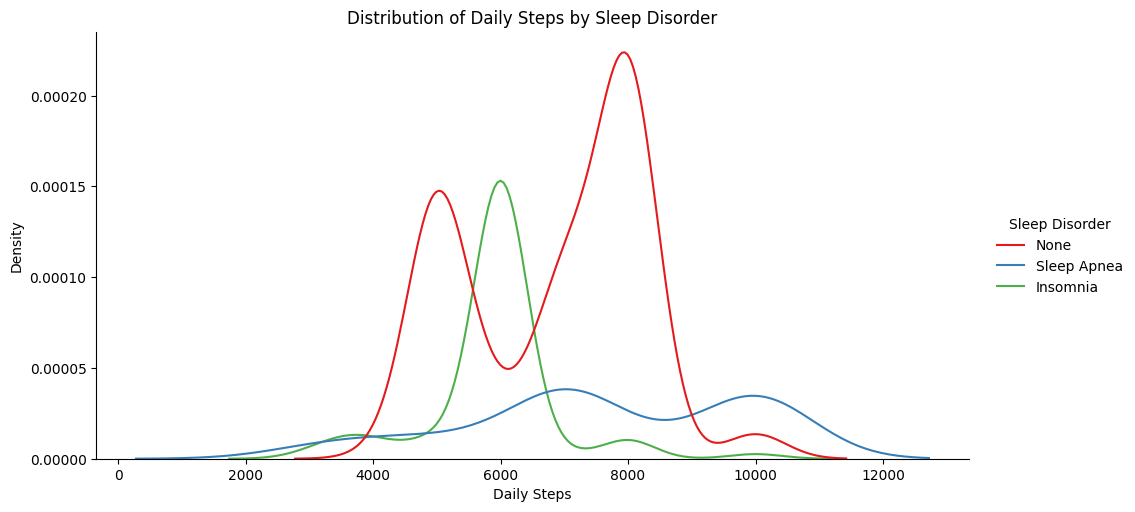


Post hoc test for Daily Steps:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     1      2 -951.6693    0.0 -1426.7081 -476.6305   True
     1      3  766.2627 0.0005   293.4823 1239.0432   True
     2      3 1717.9321    0.0  1141.9303 2293.9339   True
----------------------------------------------------------


**KEY**: {'None': 1, 'Insomnia': 2, 'Sleep Apnea': 3}


## RESULT:

People without sleep disorders generally fall into two groups—some are **moderately active**, while others are **highly active**. Those with **Insomnia tend to be less active**, while the **Sleep Apnea group varies the most**, with some being very active and others less so.

A detailed analysis confirms that:
- People with **Insomnia walk less** than both other groups.
- Those with **Sleep Apnea take more steps** on average.
- Activity levels in the **Sleep Apnea group are the most unpredictable**.

This suggests that **sleep disorders may be linked to differences in daily movement and energy levels**.


In [9]:
display(Markdown("# Does `Daily Steps` affect an individual's sleep health?"))


# Distribution of the Daily Steps
sns.displot(x= df["Daily Steps"], hue= df["Sleep Disorder"], kind= 'kde', palette= 'Set1', height= 5, aspect= 2)
plt.title("Distribution of Daily Steps by Sleep Disorder")
plt.show()

# Statistical Inference
post_hoc_ds = pairwise_tukeyhsd(df["Daily Steps"], df["target"])
print("\nPost hoc test for Daily Steps:\n", post_hoc_ds)
display(Markdown("**KEY**: "+ str(sleep_disorder_map)))

text = '''
## RESULT:

People without sleep disorders generally fall into two groups—some are **moderately active**, while others are **highly active**. Those with **Insomnia tend to be less active**, while the **Sleep Apnea group varies the most**, with some being very active and others less so.

A detailed analysis confirms that:
- People with **Insomnia walk less** than both other groups.
- Those with **Sleep Apnea take more steps** on average.
- Activity levels in the **Sleep Apnea group are the most unpredictable**.

This suggests that **sleep disorders may be linked to differences in daily movement and energy levels**.
'''
display(Markdown(text))


# BMI Category vs. Sleep Disorder

**There is a significant relationship** between BMI Category and Sleep Disorders. (p = 0.0000)

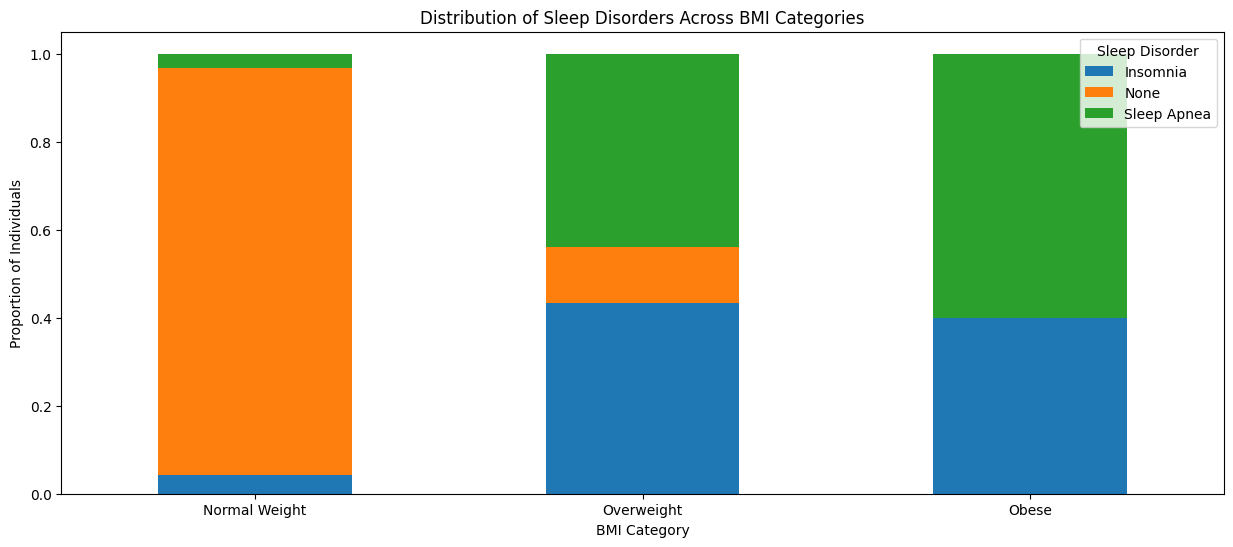


## Result:
This chart revealed that the BMI of an individual can cause sleep disorder. The higher an individual's BMI category, the higher the tendency of that individual to develop a sleep disorder.


In [10]:
# Create a contingency table
df["BMI Category"] = df["BMI Category"].str.replace("Normal$", "Normal Weight", regex=True) # Notice that there was an input error
contingency_table = pd.crosstab(df["BMI Category"], df["Sleep Disorder"])
contingency_table = contingency_table.loc[["Normal Weight", "Overweight", "Obese"]] # Setting the BMI order to my taste

# Perform Chi-Square test
_, p, dof, expected = chi2_contingency(contingency_table)

# Display test result
if p < 0.05:
    significance = "**There is a significant relationship** between BMI Category and Sleep Disorders."
else:
    significance = "**No significant relationship** was found between BMI Category and Sleep Disorders."

display(Markdown(f"# BMI Category vs. Sleep Disorder\n\n{significance} (p = {p:.4f})"))

# Plot stacked bar chart
contingency_table.div(contingency_table.sum(1), axis=0).plot(kind='bar', stacked=True, figsize=(15,6))
plt.title("Distribution of Sleep Disorders Across BMI Categories")
plt.xlabel("BMI Category")
plt.ylabel("Proportion of Individuals")
plt.legend(title="Sleep Disorder")
plt.xticks(rotation=0)
plt.show()

text = """
## Result:
This chart revealed that the BMI of an individual can cause sleep disorder. The higher an individual's BMI category, the higher the tendency of that individual to develop a sleep disorder.
"""

display(Markdown(text))

# Physical Activity Level and Sleep Disorder

It is recommended to exercise and not have a sedimentary lifestyle. Also, there are research that correlate exercise with reducing an individual's stress level which in turns improves one's sleep health

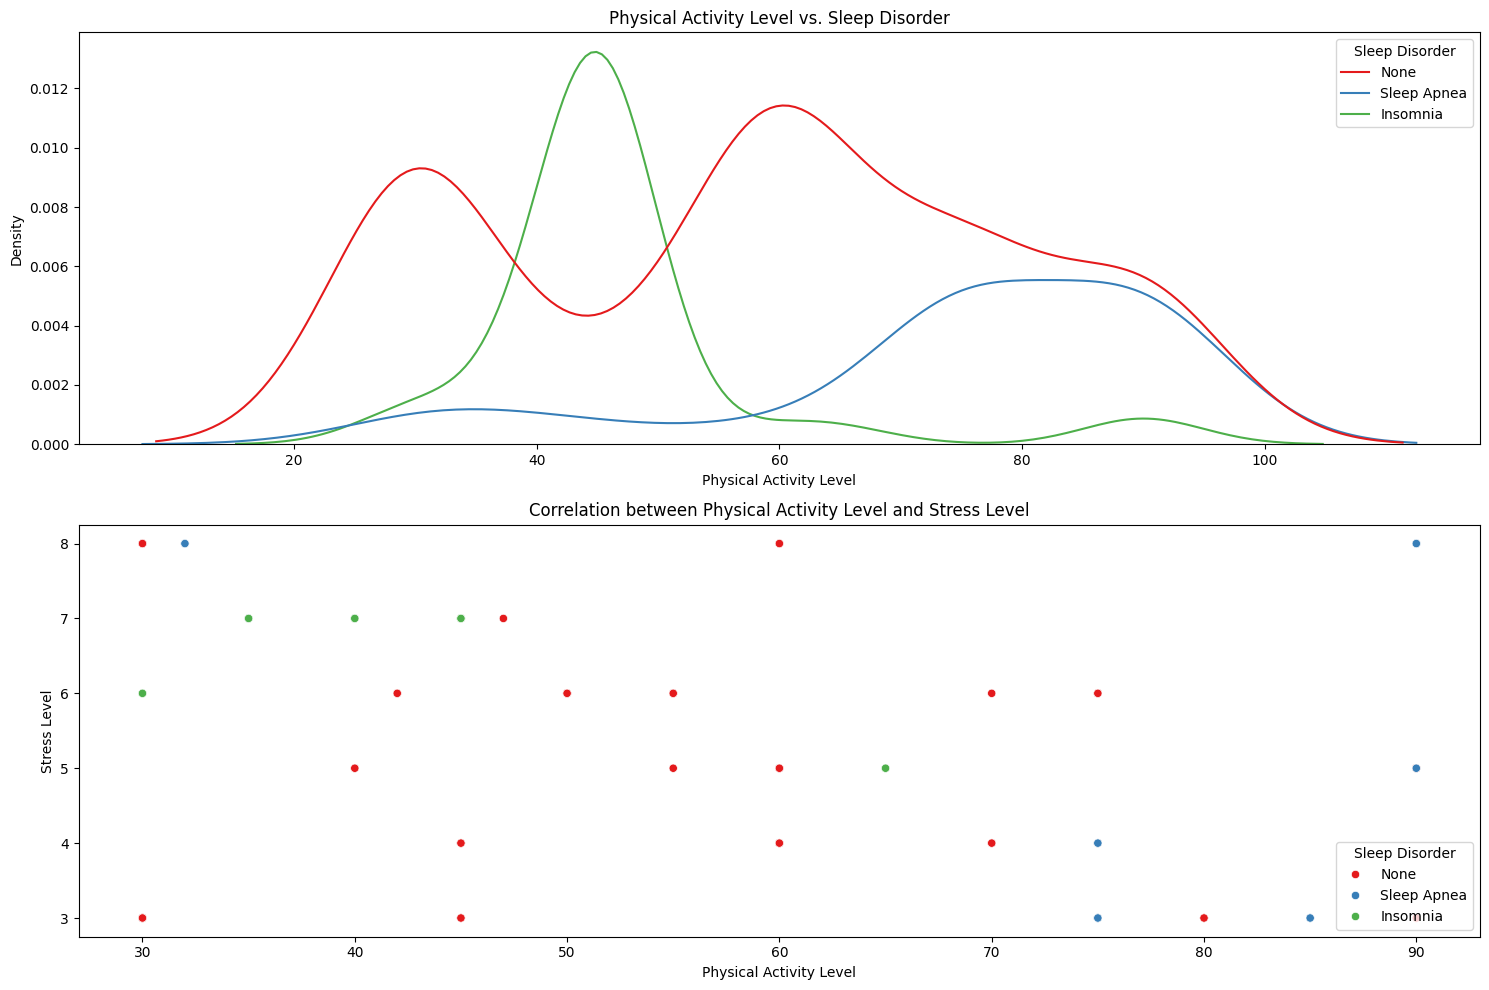


Post hoc test for Physical Activity Level:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     1      2 -11.1316   0.0 -16.9841 -5.2791   True
     1      3  16.8451   0.0  11.0204 22.6698   True
     2      3  27.9767   0.0  20.8803 35.0731   True
----------------------------------------------------


**KEY**: {'None': 1, 'Insomnia': 2, 'Sleep Apnea': 3}


## **Result**:
People **without sleep disorders** have a **wider range of activity levels**, while those with **insomnia are the least active**, averaging around **40 minutes** of exercise. **Sleep apnea cases** vary the most, with some being quite active.

Key takeaways:
- People with **insomnia exercise much less** than others (**about 11 minutes less than those without sleep issues and 28 minutes less than those with sleep apnea**).
- Those with **sleep apnea tend to be more active**, exercising **about 17 minutes more than those without sleep disorders**.

This suggests that **lower physical activity may be linked to sleep problems**, especially insomnia.

Also, there is no correlation between Physical Activity Level and Stress Level based on this dataset


In [11]:
display(Markdown("# Physical Activity Level and Sleep Disorder"))
display(Markdown("It is recommended to exercise and not have a sedimentary lifestyle. Also, there are research that correlate exercise with reducing an individual's stress level which in turns improves one's sleep health"))

fig, axes= plt.subplots(2,1, figsize=(15,10))

# Subplot 1: Distribution of Physical Activity Level across Sleep Disorders
axes[0].set_title("Physical Activity Level vs. Sleep Disorder")
sns.kdeplot(x=df["Physical Activity Level"], hue=df["Sleep Disorder"], ax=axes[0], palette= "Set1")

# Subplot 2: Correlation between Physical Activity Level and Stress Level across Disorders
axes[1].set_title("Correlation between Physical Activity Level and Stress Level")
sns.scatterplot(x=df["Physical Activity Level"], y=df["Stress Level"], hue=df["Sleep Disorder"], ax=axes[1], palette="Set1")
plt.tight_layout()
plt.show()

# Post hoc analysis
post_hoc_pal = pairwise_tukeyhsd(df["Physical Activity Level"], df["target"])
print("\nPost hoc test for Physical Activity Level:\n", post_hoc_pal)
display(Markdown("**KEY**: "+ str(sleep_disorder_map)))

text="""
## **Result**:
People **without sleep disorders** have a **wider range of activity levels**, while those with **insomnia are the least active**, averaging around **40 minutes** of exercise. **Sleep apnea cases** vary the most, with some being quite active.

Key takeaways:
- People with **insomnia exercise much less** than others (**about 11 minutes less than those without sleep issues and 28 minutes less than those with sleep apnea**).
- Those with **sleep apnea tend to be more active**, exercising **about 17 minutes more than those without sleep disorders**.

This suggests that **lower physical activity may be linked to sleep problems**, especially insomnia.

Also, there is no correlation between Physical Activity Level and Stress Level based on this dataset
"""

display(Markdown(text))

# Correlation between Sleep Quality, Sleep Duration and Sleep Disorder

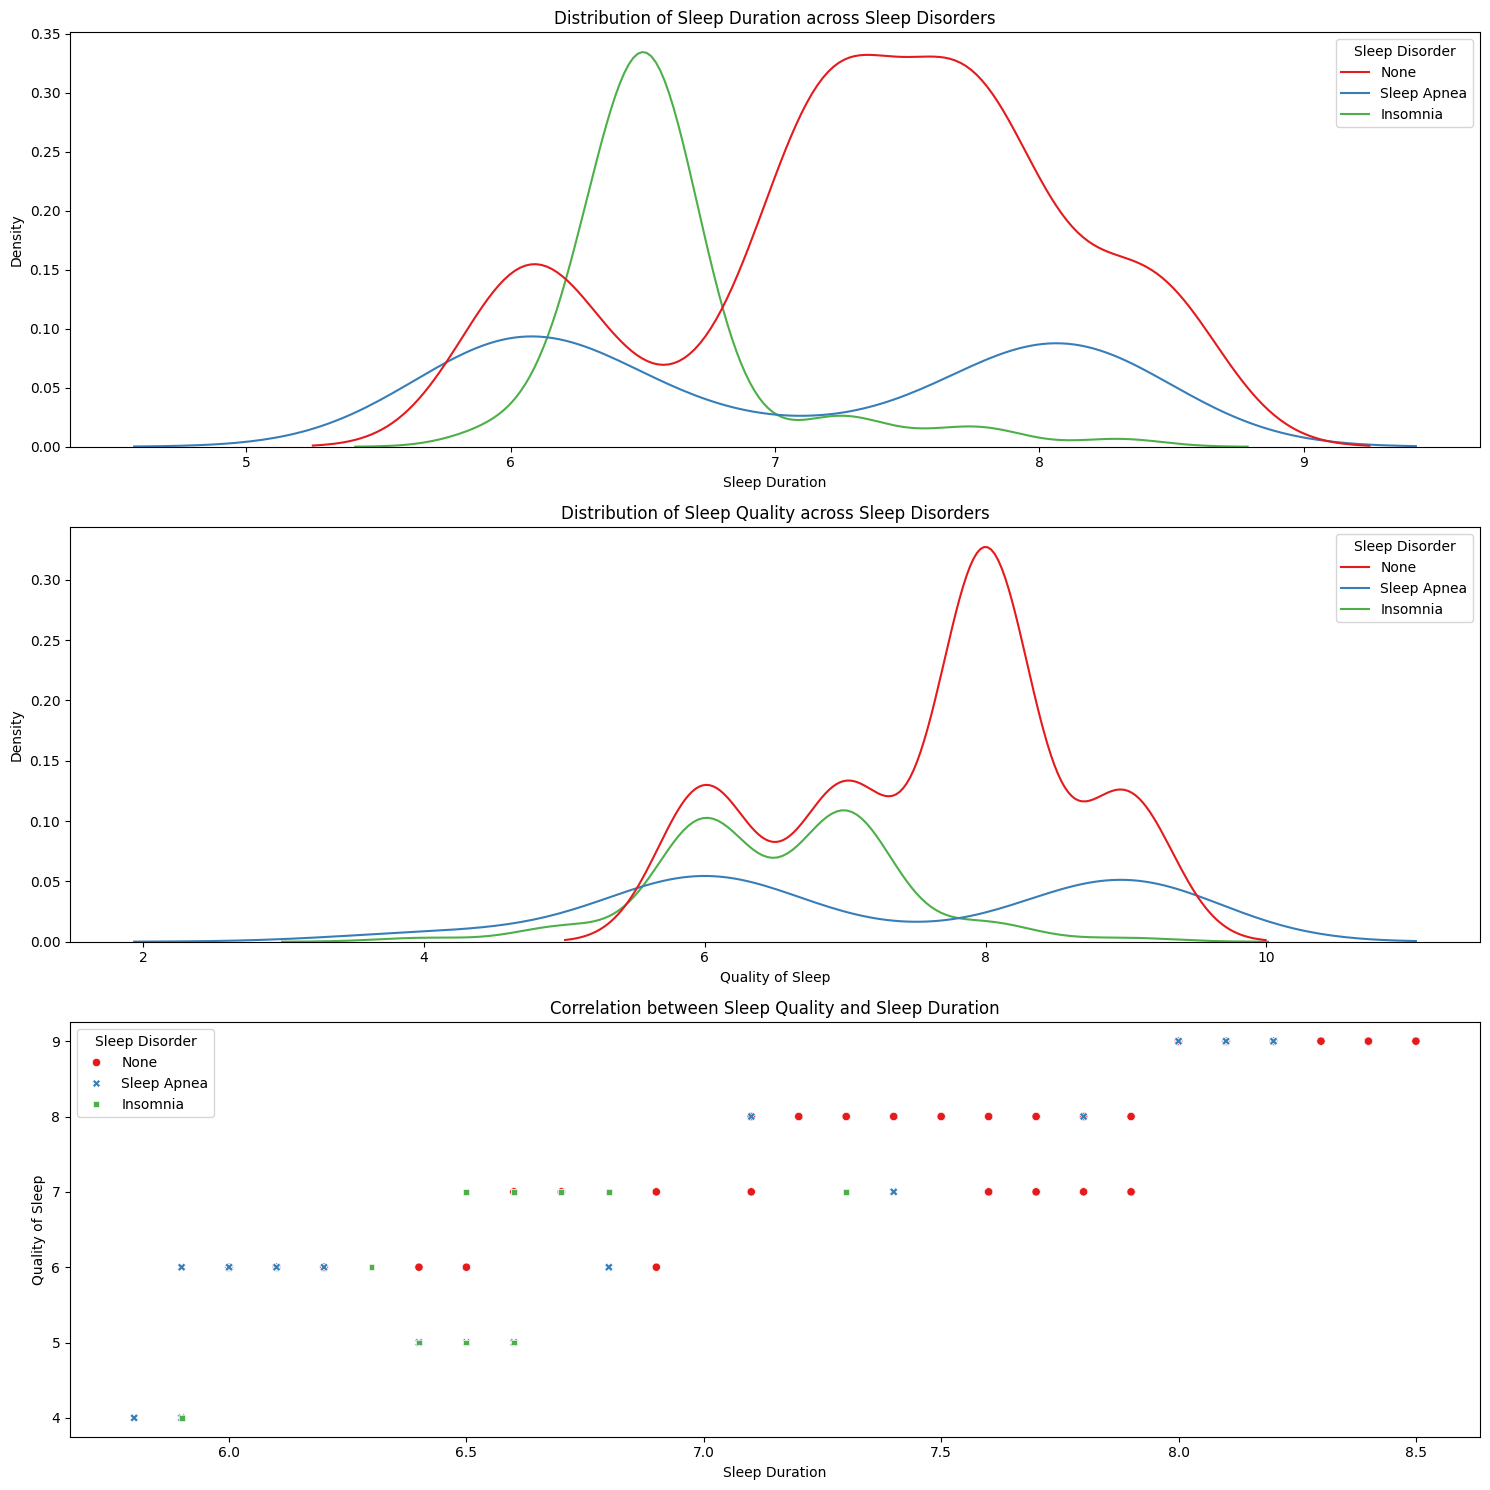


## **RESULTS:**

1. **Distribution of Sleep Duration across Sleep Disorders**
   - **No Sleep Disorder (red)**: Shows a clear peak at higher sleep hours, indicating that most individuals without a sleep disorder get **longer, more consistent sleep**.
   - **Sleep Apnoea (blue)**: Distribution is somewhat spread out, suggesting **varied sleep durations**—some get less sleep, some more.
   - **Insomnia (green)**: Peak is shifted to **fewer hours**, indicating **shorter sleep duration** on average.

2. **Distribution of Sleep Quality across Sleep Disorders**
   - **No Sleep Disorder (red)**: Generally **higher quality** scores, with a clear peak in the upper range.
   - **Sleep Apnoea (blue)**: Quality scores vary more widely, but tend to be **lower than the ‘No Disorder’ group**.
   - **Insomnia (green)**: Concentrated in the **lower quality range**, reflecting **more difficulties with restful sleep**.

3. **Correlation between Sleep Quality and Sleep Duration**
   - There is a general **positive relationship**: **longer sleep** often corresponds to **higher reported quality**.
   - **No Sleep Disorder (red)** points cluster toward **longer duration and higher quality**, while **Insomnia (green)** tends toward **shorter duration and lower quality**. **Sleep Apnoea (blue)** shows **moderate to high variability** in both measures.

---

## **Summary**
People **without sleep disorders** typically enjoy **longer, higher-quality sleep**, while those with **insomnia** tend to experience **shorter durations and lower quality**. **Sleep apnoea** lies in between but can still reduce both sleep length and quality. Overall, **longer sleep** usually goes hand-in-hand with **better sleep quality**, reinforcing the idea that getting enough rest is crucial for feeling well-rested.

In [12]:
display(Markdown("# Correlation between Sleep Quality, Sleep Duration and Sleep Disorder"))

fig, axes = plt.subplots(3,1, figsize=(15,15))

# Subplot 1: Distribution of Sleep Duration across Sleep Disorders
axes[0].set_title("Distribution of Sleep Duration across Sleep Disorders")
sns.kdeplot(data=df, x="Sleep Duration", hue="Sleep Disorder", palette="Set1", ax=axes[0])

# Subplot 2 Distribution of Sleep Quality across Sleep Disorders:
axes[1].set_title("Distribution of Sleep Quality across Sleep Disorders")
sns.kdeplot(data=df, x="Quality of Sleep", hue="Sleep Disorder", palette="Set1", ax=axes[1])

# Suplot 3: Correlation between Sleep Quality and Sleep Duration
axes[2].set_title("Correlation between Sleep Quality and Sleep Duration")
sns.scatterplot(data=df,
                x="Sleep Duration",
                y="Quality of Sleep",
                hue="Sleep Disorder",
                style="Sleep Disorder",
                palette="Set1",
                ax=axes[2])

plt.tight_layout()
plt.show()

text= """
## **RESULTS:**

1. **Distribution of Sleep Duration across Sleep Disorders**
   - **No Sleep Disorder (red)**: Shows a clear peak at higher sleep hours, indicating that most individuals without a sleep disorder get **longer, more consistent sleep**.
   - **Sleep Apnoea (blue)**: Distribution is somewhat spread out, suggesting **varied sleep durations**—some get less sleep, some more.
   - **Insomnia (green)**: Peak is shifted to **fewer hours**, indicating **shorter sleep duration** on average.

2. **Distribution of Sleep Quality across Sleep Disorders**
   - **No Sleep Disorder (red)**: Generally **higher quality** scores, with a clear peak in the upper range.
   - **Sleep Apnoea (blue)**: Quality scores vary more widely, but tend to be **lower than the ‘No Disorder’ group**.
   - **Insomnia (green)**: Concentrated in the **lower quality range**, reflecting **more difficulties with restful sleep**.

3. **Correlation between Sleep Quality and Sleep Duration**
   - There is a general **positive relationship**: **longer sleep** often corresponds to **higher reported quality**.
   - **No Sleep Disorder (red)** points cluster toward **longer duration and higher quality**, while **Insomnia (green)** tends toward **shorter duration and lower quality**. **Sleep Apnoea (blue)** shows **moderate to high variability** in both measures.

---

## **Summary**
People **without sleep disorders** typically enjoy **longer, higher-quality sleep**, while those with **insomnia** tend to experience **shorter durations and lower quality**. **Sleep apnoea** lies in between but can still reduce both sleep length and quality. Overall, **longer sleep** usually goes hand-in-hand with **better sleep quality**, reinforcing the idea that getting enough rest is crucial for feeling well-rested."""

display(Markdown(text))

# Correlation between Age and Sleep Disorder

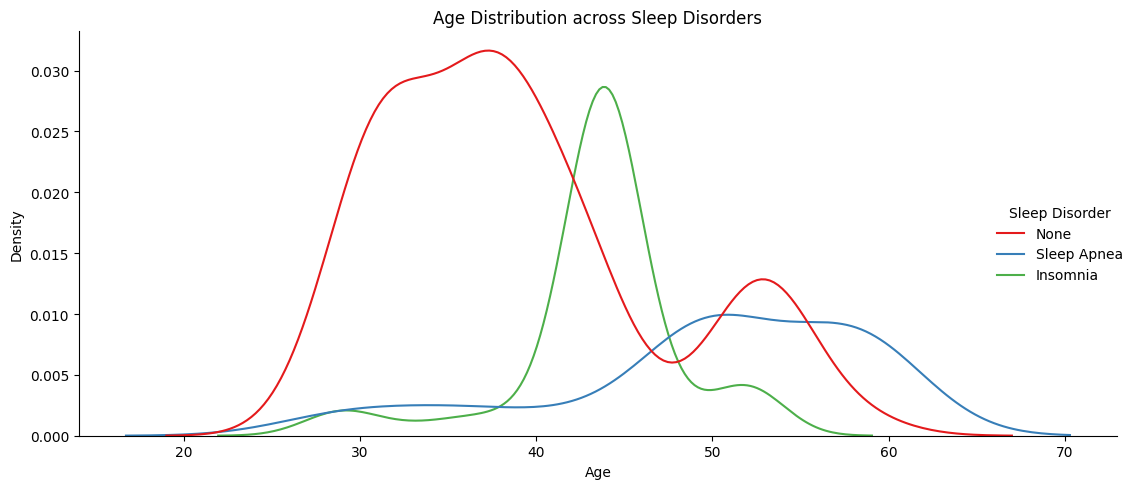

Post Hoc Analysis of Age between Sleep Disorder:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
     1      2    4.483   0.0 2.1185  6.8474   True
     1      3  10.6686   0.0 8.3154 13.0218   True
     2      3   6.1856   0.0 3.3187  9.0526   True
--------------------------------------------------


**KEY**: {'None': 1, 'Insomnia': 2, 'Sleep Apnea': 3}


# **RESULT**:
The chart revealed that older individuals are more likely to develop sleeping disorder.
- Individuals **without sleep disorder** shows a peak age younger ages compared to **insomiac** and **sleep apnea** individuals.
- Middle aged individuals tends to have **insomnia** with a peak age of **45 years**
- **Sleep Apnea** is more dispersed compared to the others. However, older individuals tends to have *sleep apnea**.

In summary: There is a significant higher the chance for people to develop sleep disorders as we age.


In [13]:
display(Markdown("# Correlation between Age and Sleep Disorder"))

sns.displot(data=df, x="Age", hue="Sleep Disorder", kind="kde", palette="Set1", height=5, aspect=2)
plt.title("Age Distribution across Sleep Disorders")
plt.tight_layout()
plt.show()

PostHoc_age = pairwise_tukeyhsd(df["Age"], df["target"])
print("Post Hoc Analysis of Age between Sleep Disorder:\n", PostHoc_age)
display(Markdown("**KEY**: "+ str(sleep_disorder_map)))

text= """
# **RESULT**:
The chart revealed that older individuals are more likely to develop sleeping disorder.
- Individuals **without sleep disorder** shows a peak age younger ages compared to **insomiac** and **sleep apnea** individuals.
- Middle aged individuals tends to have **insomnia** with a peak age of **45 years**
- **Sleep Apnea** is more dispersed compared to the others. However, older individuals tends to have *sleep apnea**.

In summary: There is a significant higher the chance for people to develop sleep disorders as we age.
"""

display(Markdown(text))

# Occupation vs. Sleep Disorder

**No significant relationship** was found between Occupation and Sleep Disorders. (p = 0.8764)

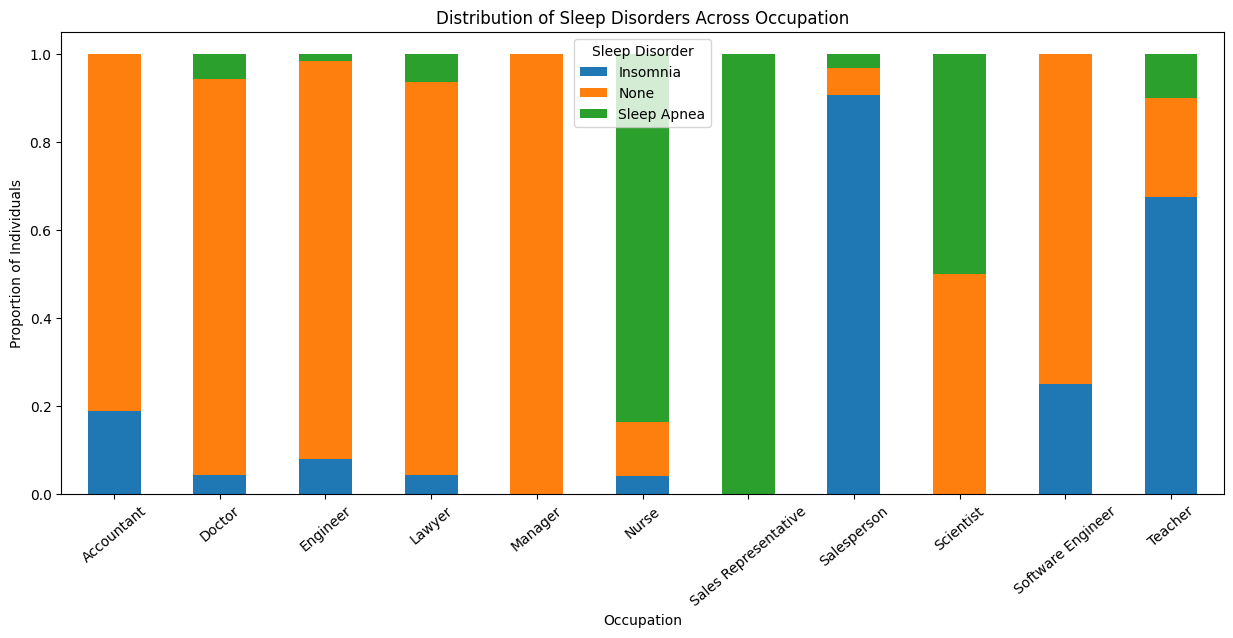

## RESULT:
 It should be noted that there is no significant relationship between Occupation and Sleep Health. However, Doctors, engineers, and lawyers mostly **do not** have sleep disorders, while **nurses (83.6%) and sales representatives (100%)** have a high prevalence of **Sleep Apnea**. **Salespersons (90.6%) and teachers (67.5%)** are more affected by **Insomnia**, likely due to job-related stress. **Managers report no sleep disorders**, possibly indicating better work-life balance. These patterns suggest that certain occupations may influence sleep health.

In [14]:
contingency_table = pd.crosstab(df["Occupation"], df["Sleep Disorder"], normalize="index")

# Perform Chi-Square test
_, p, dof, expected = chi2_contingency(contingency_table)

# Display test result
if p < 0.05:
    significance = "**There is a significant relationship** between Occupation and Sleep Disorders."
else:
    significance = "**No significant relationship** was found between Occupation and Sleep Disorders."

display(Markdown(f"# Occupation vs. Sleep Disorder\n\n{significance} (p = {p:.4f})"))

# Plot stacked bar chart
contingency_table.plot(kind='bar', stacked=True, figsize=(15,6))
plt.title("Distribution of Sleep Disorders Across Occupation")
plt.xlabel("Occupation")
plt.ylabel("Proportion of Individuals")
plt.legend(title="Sleep Disorder")
plt.xticks(rotation=40)
plt.show()

display(Markdown("## RESULT:\n It should be noted that there is no significant relationship between Occupation and Sleep Health. However, Doctors, engineers, and lawyers mostly **do not** have sleep disorders, while **nurses (83.6%) and sales representatives (100%)** have a high prevalence of **Sleep Apnea**. **Salespersons (90.6%) and teachers (67.5%)** are more affected by **Insomnia**, likely due to job-related stress. **Managers report no sleep disorders**, possibly indicating better work-life balance. These patterns suggest that certain occupations may influence sleep health."))

# MACHINE LEARNING SECTION

# FEATURE SELECTION

## Checking for correlation

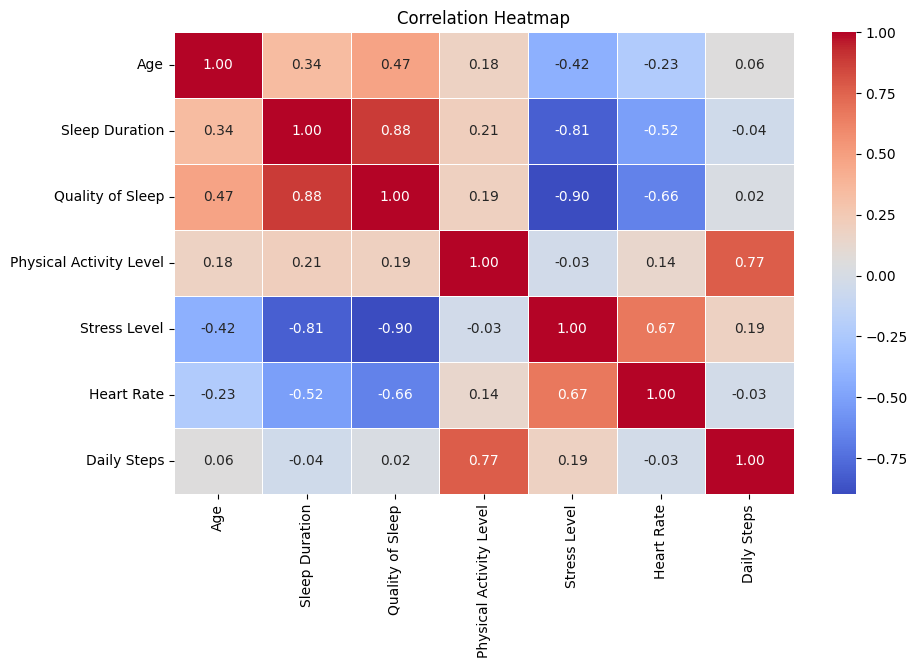

## Checking for f-scores

                   Feature    F-Score       P-Value
0                      Age  58.408963  8.852105e-23
3  Physical Activity Level  44.150579  6.306184e-18
5               Heart Rate  32.948639  6.737408e-14
1           Sleep Duration  31.913468  1.626151e-13
2         Quality of Sleep  27.600604  6.688642e-12
6              Daily Steps  24.776923  7.942397e-11
4             Stress Level   6.603565  1.520459e-03


## Checking for correlation amongst the cat variables

        Feature  Chi-Square Score       P-Value
1    Occupation        338.329511  3.409418e-74
2  BMI Category        268.453644  5.081968e-59
0        Gender         26.862604  1.468452e-06
3   BP Category         14.539623  6.962433e-04



Based on the correlation matrix, sleep quality, sleep duration and stress level are highly correlated. This is an issue because of multicollinearity. Also, based on the f-statistics, Stress level and quality sleep have lower f-scores compared to sleep duration. It is advisable to remove redudant features.
**Remove**: `Quality of Sleep` and `Stress level`


In [15]:
display(Markdown("# FEATURE SELECTION"))

display(Markdown("## Checking for correlation"))
# Select numerical features
num_features = ["Age", "Sleep Duration", "Quality of Sleep",
                "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


display(Markdown("## Checking for f-scores"))
# Define numerical features and target
num_features = ["Age", "Sleep Duration", "Quality of Sleep",
                "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]
X = df[num_features]
y = df["target"]  # Target

# Compute ANOVA F-test scores
f_scores, p_values = f_classif(X, y)

# Display results
anova_results = pd.DataFrame({"Feature": num_features, "F-Score": f_scores, "P-Value": p_values})
anova_results = anova_results.sort_values(by="F-Score", ascending=False)
print(anova_results)



display(Markdown("## Checking for correlation amongst the cat variables"))
# Encode categorical features as numbers
cat_features = ["Gender", "Occupation", "BMI Category", "BP Category"]
df_encoded = df.copy()
for col in cat_features:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

# Compute Chi-square scores
X_cat = df_encoded[cat_features]
yz = df["target"]
chi_scores, p_values1 = chi2(X_cat, yz)

# Display results
chi_results = pd.DataFrame({"Feature": cat_features, "Chi-Square Score": chi_scores, "P-Value": p_values1})
chi_results = chi_results.sort_values(by="Chi-Square Score", ascending=False)
print(chi_results)


text= """
Based on the correlation matrix, sleep quality, sleep duration and stress level are highly correlated. This is an issue because of multicollinearity. Also, based on the f-statistics, Stress level and quality sleep have lower f-scores compared to sleep duration. It is advisable to remove redudant features.
**Remove**: `Quality of Sleep` and `Stress level`
"""
display(Markdown(text))

In [16]:
display(Markdown("# FEATURE PREPROCESSING\n Due to the number of data points, I will be using Label Encoder to encode my categorical features."))

# Before encoding, it is best practice to split your data.
X = df.drop(columns= ['target', 'Systolic BP', 'Diastolic BP', 'Sleep Disorder'])
y = df['Sleep Disorder']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.15, random_state=42)

# Encoding the features
cat_features = ["Gender", "Occupation", "BMI Category", "BP Category"]

f_encoder = {}
for col in cat_features:
    le = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    X_train[col] = le.fit_transform(X_train[[col]])
    X_test[col] = le.transform(X_test[[col]])
    f_encoder[col] = le     # Save encoder for future use

# Encoding the target
t_encoder = LabelEncoder()
y_train = t_encoder.fit_transform(y_train)
y_test = t_encoder.transform(y_test)

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)



# FEATURE PREPROCESSING
 Due to the number of data points, I will be using Label Encoder to encode my categorical features.

In [17]:
display(Markdown("# BASE MODEL TRAINING"))

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(decision_function_shape= 'ovo'),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate models
for name, model in models.items():
    scores = cross_val_score(model, X_scaled_train, y_train, cv=cv, scoring="f1_macro")
    print(f"{name}: Mean F1-score = {np.mean(scores):.4f}")

display(Markdown("## RESULT:\n From the f1-macro, SVM and Random Forest are the best performing models. I will be using SVM has my base model and tune it for better result."))

base_model = SVC(probability=True).fit(X_scaled_train, y_train)

# BASE MODEL TRAINING

Logistic Regression: Mean F1-score = 0.8527
SVM: Mean F1-score = 0.8688
Random Forest: Mean F1-score = 0.8684
KNN: Mean F1-score = 0.8350


## RESULT:
 From the f1-macro, SVM and Random Forest are the best performing models. I will be using SVM has my base model and tune it for better result.

In [18]:
display(Markdown("# MODEL TUNING\n During feature selection, I concluded to remove `Quality of Sleep` and `Stress Level`. I will be doing it and re-evaluate our model's performance"))

# Deleting Quality of Sleep and Stress Level (4 and 6)
X_scaled_test_new = np.delete(X_scaled_test, [4, 6], axis=1)
X_scaled_train_new = np.delete(X_scaled_train, [4, 6], axis=1)

# Evaluate models
for name, model in models.items():
    scores = cross_val_score(model, X_scaled_train_new, y_train, cv=cv, scoring="f1_macro")
    print(f"{name}: Mean F1-score = {np.mean(scores):.4f}")

text= """
## RESULT:
After removing those columns, it was discovered that other models performed better than the base model.
However, SVC performed worse than the base model although it was the best performing model.
For this reason, I will be using SVC and tune it hyperparameters, for better result.
"""
display(Markdown(text))


# MODEL TUNING
 During feature selection, I concluded to remove `Quality of Sleep` and `Stress Level`. I will be doing it and re-evaluate our model's performance

Logistic Regression: Mean F1-score = 0.8618
SVM: Mean F1-score = 0.8679
Random Forest: Mean F1-score = 0.8524
KNN: Mean F1-score = 0.8415



## RESULT:
After removing those columns, it was discovered that other models performed better than the base model.
However, SVC performed worse than the base model although it was the best performing model.
For this reason, I will be using SVC and tune it hyperparameters, for better result.


In [19]:
display(Markdown("## FEATURE SELECTION 2: USING RFE"))

# Define the base estimator
svm_estimator =  SVC(kernel="linear", decision_function_shape="ovo")

# Try different values for n_features_to_select
n_features_list = list(range(3, 12, 1))  # Different numbers of selected features
results = {}
best_features = {} # To get the selected features


print("") # For decoration

for n in n_features_list:
    # Perform RFE
    rfe = RFE(estimator=svm_estimator, n_features_to_select=n)
    X_rfe = rfe.fit_transform(X_scaled_train, y_train)

    # Train and evaluate SVM
    scores = cross_val_score(svm_estimator, X_rfe, y_train, cv=cv, scoring="f1_macro")
    mean_score = scores.mean()

    # Store results
    results[n] = mean_score
    best_features[n] = rfe.support_
    print(f"Selected {n} features: Mean F1-score = {mean_score:.4f}")

# Print the best-performing feature count
best_n = max(results, key=results.get)
print(f"\nBest number of features: {best_n} with Mean F1-score = {results[best_n]:.4f}")

# Print the best-performing feature names
feature_names = X_train.columns
selected_mask = best_features[best_n] # A boolean mask
selected_features = feature_names[selected_mask]
print("Selected Features:", list(selected_features))


text="""
## RESULT:
Based on Recursive Feature Elimination (RFE), 7 features were selected. I will be using the feautures to train my model.
"""
display(Markdown(text))

## FEATURE SELECTION 2: USING RFE


Selected 3 features: Mean F1-score = 0.7907
Selected 4 features: Mean F1-score = 0.7904
Selected 5 features: Mean F1-score = 0.8507
Selected 6 features: Mean F1-score = 0.8472
Selected 7 features: Mean F1-score = 0.8685
Selected 8 features: Mean F1-score = 0.8681
Selected 9 features: Mean F1-score = 0.8531
Selected 10 features: Mean F1-score = 0.8500
Selected 11 features: Mean F1-score = 0.8439

Best number of features: 7 with Mean F1-score = 0.8685
Selected Features: ['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Heart Rate', 'Daily Steps']



## RESULT:
Based on Recursive Feature Elimination (RFE), 7 features were selected. I will be using the feautures to train my model.


In [20]:
display(Markdown("# FINETUNE MODEL"))

# Filter only the selected features
X_rfe_train = X_scaled_train[:, selected_mask]  # Keep only the selected columns for train
X_rfe_test = X_scaled_test[:, selected_mask]  # Keep only the selected columns for test

# Training the SVM
finetuned_model = SVC(decision_function_shape="ovo", probability=True)
finetuned_model.fit(X_rfe_train, y_train)

# FINETUNE MODEL

SVC(decision_function_shape='ovo', probability=True)

In [21]:
display(Markdown("# HYPERPARAMETER TUNING"))

# Instantiating SVM
svm_model = SVC(decision_function_shape="ovo", probability=True)


# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.01, .1, 1],
    'degree': [2, 3, 4]
}

# Perform GridSearchCV for RFE data
grid_search = GridSearchCV(svm_model, param_grid, cv=cv, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_rfe_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters for RFE data: {best_params}")
print(f"Best F1-macro Score for RFE data: {best_score:.4f}")


# Perform GridSearchCV for full data
grid_search1 = GridSearchCV(svm_model, param_grid, cv=cv, scoring="f1_macro", n_jobs=-1)
grid_search1.fit(X_rfe_train, y_train)

# Get the best hyperparameters
best_params1 = grid_search1.best_params_
best_score1 = grid_search1.best_score_

print(f"Best Parameters for full data: {best_params1}")
print(f"Best F1-macro Score for full data: {best_score1:.4f}")

display(Markdown("## RESULT:\n Since with or without RFE, the finetuned model performs similarly, I won't be doing with the RFE method. Also, SVM does its own feature selection just like Lasso and Ridge"))

# HYPERPARAMETER TUNING

Best Parameters for RFE data: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Best F1-macro Score for RFE data: 0.8795
Best Parameters for full data: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Best F1-macro Score for full data: 0.8795


## RESULT:
 Since with or without RFE, the finetuned model performs similarly, I won't be doing with the RFE method. Also, SVM does its own feature selection just like Lasso and Ridge

# FINAL MODEL AND EVALUATION

F1-macro Score: 0.9722



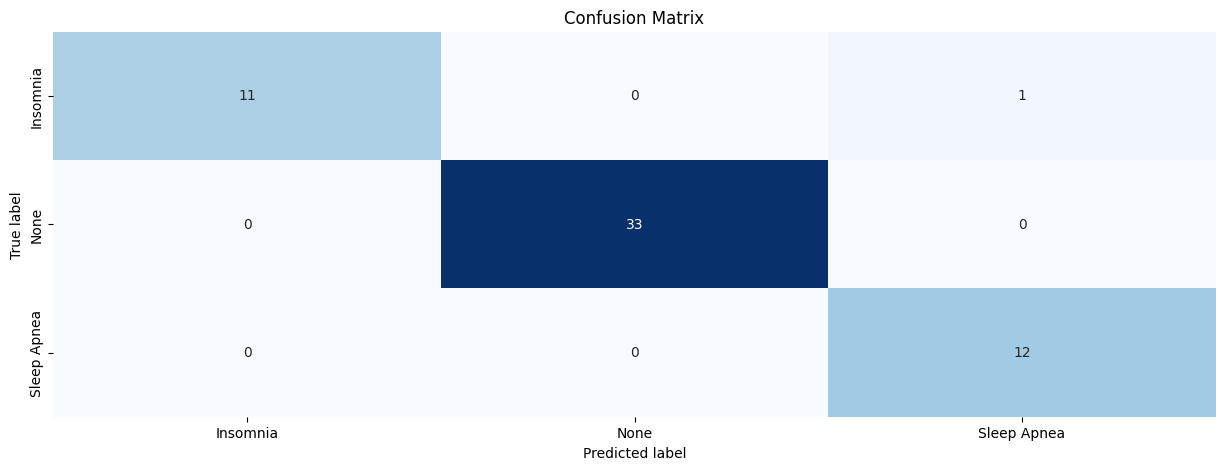


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       1.00      1.00      1.00        33
           2       0.92      1.00      0.96        12

    accuracy                           0.98        57
   macro avg       0.97      0.97      0.97        57
weighted avg       0.98      0.98      0.98        57



In [22]:
display(Markdown("# FINAL MODEL AND EVALUATION"))

# Training the final model based on the best params
final_model= SVC(**best_params1, decision_function_shape="ovo", probability=True)
final_model.fit(X_scaled_train, y_train)

# Predicting unseen data for evaluation
final_model_preds = final_model.predict(X_scaled_test)
#final_model_probs = final_model.predict_proba(X_scaled_test)


# Computing the f1 score
f1 = metrics.f1_score(y_test, final_model_preds, average="macro")
print(f"F1-macro Score: {f1:.4f}\n")

# Computing the confusion matix heatmap
matrix = metrics.confusion_matrix(y_test, final_model_preds)
plt.figure(figsize= (15,5))
class_labels = list(t_encoder.classes_)
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels= class_labels, yticklabels= class_labels)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

# Computing the classification report
report = metrics.classification_report(y_test, final_model_preds)
print("\nClassification Report:")
print(report)

100%|██████████| 57/57 [02:10<00:00,  2.29s/it]


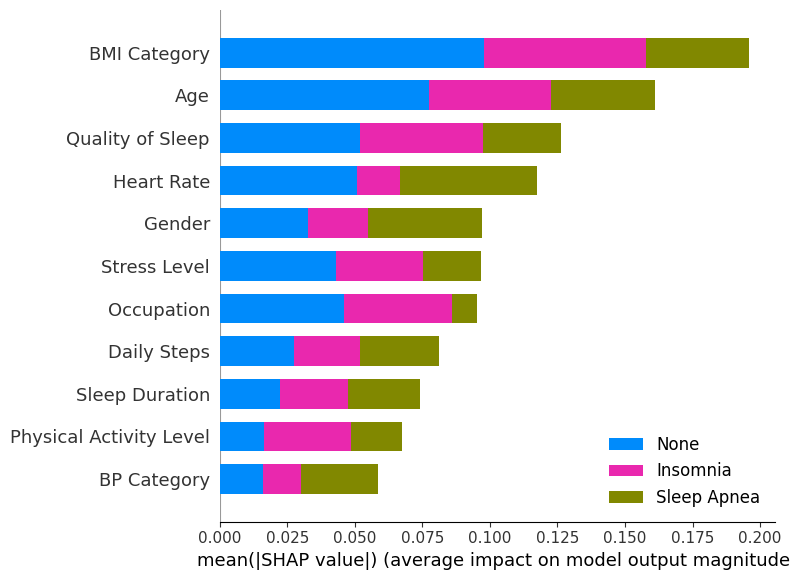


## RESULT:
The
From the SHAP analysis, it was discovered that `BMI Category` is the best feature to predict if an individual have sleep disorders or not. That means, `BMI Category` is a good predictor of sleep disorders.
However, `Heart Rate` and `BP Category` are good predictors to predict **Sleep Apnea**


In [23]:
feature_names = X_train.columns
class_names = t_encoder.inverse_transform(final_model.classes_)

# Create SHAP explainer
shap_data = shap.kmeans(X_scaled_train, 50) # For faster SHAP analysis
explainer = shap.KernelExplainer(final_model.predict_proba, shap_data)

# Compute SHAP values
shap_values = explainer.shap_values(X_scaled_test)

# Summary plot
shap.summary_plot(shap_values,
                  X_scaled_test,
                  plot_type="bar",
                  feature_names=feature_names,
                  class_names=class_names,
                  title= "Features Impact on the Model")

text="""
## RESULT:
The
From the SHAP analysis, it was discovered that `BMI Category` is the best feature to predict if an individual have sleep disorders or not. That means, `BMI Category` is a good predictor of sleep disorders.
However, `Heart Rate` and `BP Category` are good predictors to predict **Sleep Apnea**
"""
display(Markdown(text))


In [24]:
display(Markdown("# <INVALID CODE> PREPROCESSING PIPELINE (DEPRECATED: CHECK transformers/)"))


# Custom transformer to calculate BMI Category from weight and height, using gender-specific criteria.
class BMICategorizer(BaseEstimator, TransformerMixin):
    """
    Calculates BMI Category based on gender-specific criteria.
    """
    def fit(self, X, y=None):
        self.is_fitted_ = True
        return self
    def transform(self, X):
        X = X.copy()
        if 'weight' in X.columns and 'height' in X.columns:
            X['BMI'] = X['weight'] / (X['height'] ** 2)
            def categorize(row):
                bmi = row['BMI']
                gender = row['Gender'].lower() if isinstance(row['Gender'], str) else row['Gender']
                if gender == 'male':
                    return 'Normal Weight' if bmi < 25 else 'Overweight' if bmi < 30 else 'Obese'
                elif gender == 'female':
                    return 'Normal Weight' if bmi < 24 else 'Overweight' if bmi < 29 else 'Obese'
            X['BMI Category'] = X.apply(categorize, axis=1)
            X.drop(columns=['weight', 'height', 'BMI'], inplace=True)
        return X

class BPClassifier(BaseEstimator, TransformerMixin):
    """
    Classifies blood pressure into categories.
    """
    def fit(self, X, y=None):
        self.is_fitted_ = True
        return self

    def transform(self, X):
        X = X.copy()

        # Ensure that 'Blood Pressure' exists in the DataFrame
        if 'Blood Pressure' in X.columns:
            # Handle missing or invalid values in 'Blood Pressure'
            def split_bp(bp_value):
                try:
                    systolic, diastolic = bp_value.split('/')
                    return int(systolic), int(diastolic)
                except (ValueError, AttributeError):
                    return None, None  # Handle invalid format

            X[['Systolic BP', 'Diastolic BP']] = X['Blood Pressure'].apply(lambda x: pd.Series(split_bp(x)))
            X.drop(columns=['Blood Pressure'], inplace=True)

        # Check if 'Systolic BP' and 'Diastolic BP' are available and classify BP
        if 'Systolic BP' in X.columns and 'Diastolic BP' in X.columns:
            # Use element-wise comparison for proper row-wise checking
            X['BP Category'] = X.apply(
                lambda row: self.classify_bp(row['Systolic BP'], row['Diastolic BP']), axis=1)

            # Drop the 'Systolic BP' and 'Diastolic BP' columns as they're no longer needed
            X.drop(columns=['Systolic BP', 'Diastolic BP'], inplace=True)

        return X

    def classify_bp(self, systolic, diastolic):
        if systolic is None or diastolic is None:
            return 'Unknown'  # If values are invalid
        elif systolic < 90 or diastolic < 60:
            return 'Low'
        elif 90 <= systolic < 120 and 60 <= diastolic < 80:
            return 'Normal'
        elif 120 <= systolic < 130 and diastolic < 80:
            return 'Elevated'
        elif (130 <= systolic <= 139) or (80 <= diastolic <= 89):
            return 'High BP (Stage 1)'
        elif systolic >= 140 or diastolic >= 90:
            return 'High BP (Stage 2)'
        else:
            return 'Unknown'


# Capitalizing each word
class FeatureCorrecter(BaseEstimator, TransformerMixin):
    """
    This transformer rearranges the columns to match that of the model.
    It also capitalises Occupation column
    """
    def fit(self, X, y=None):
        self.is_fitted_ = True
        return self

    def transform(self, X):
        X = X.copy()
        expected_order = ['Gender', 'Age', 'Occupation', 'Sleep Duration',
                          'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
                          'BMI Category', 'Heart Rate', 'Daily Steps', 'BP Category']
        X = X.reindex(columns=expected_order)

        if 'Occupation' in X.columns:
            X['Occupation'] = X['Occupation'].str.title()
        return X

class SavedEncoderTransformer(BaseEstimator, TransformerMixin):
    """
    Applies the saved encoder to specified categorical columns.
    """
    def __init__(self, encoders, cat_features):
        self.encoders = encoders
        self.cat_features = cat_features

    def fit(self, X, y=None):
        self.is_fitted_ = True
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.cat_features:
            if col in X.columns:
                # Transform and override the column with encoded values.
                X[col] = self.encoders[col].transform(X[[col]])
        return X

class SavedScalerTransformer(BaseEstimator, TransformerMixin):
    """
    Uses the saved scaler to scale the entire DataFrame.
    """
    def __init__(self, scaler):
        self.scaler = scaler

    def fit(self, X, y=None):
        self.is_fitted_ = True
        return self

    def transform(self, X):
        X = X.copy()
        # The scaler expects a numpy array, so we convert and then restore DataFrame structure.
        scaled_array = self.scaler.transform(X)
        return scaled_array
        #return pd.DataFrame(scaled_array, columns=X.columns, index=X.index)


# Define feature groups
cat_features = ['Gender', 'Occupation', 'BMI Category', 'BP Category']
num_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']


# Final pipeline
pipeline = Pipeline([
    ('bmi_categorizer', BMICategorizer()),
    ('bp_classifier', BPClassifier()),
    ('feature_correcter', FeatureCorrecter()),
    ('saved_encoder', SavedEncoderTransformer(f_encoder, cat_features)),
    ('saved_scaler', SavedScalerTransformer(scaler))
])

display(Markdown("The pipeline has been created"))

# <INVALID CODE> PREPROCESSING PIPELINE (DEPRECATED: CHECK transformers/)

The pipeline has been created

In [25]:
display(Markdown("# <INVALID CODE> DEFINING USER INPUT (DEPRECATED: CHECK app.utils (UserDataCollector))"))

def get_user_input():
    try:
        gender = input("Enter gender (e.g., Male/Female): ").strip()
        age = float(input("Enter age: "))
        occupation = input("Enter occupation: ").strip()

        sleep_duration = float(input("Enter sleep duration (in hours): "))
        if sleep_duration < 0 or sleep_duration > 24:
            print("❌ Sleep duration must be between 0 and 24 hours.")
            return None

        quality_of_sleep = float(input("Enter quality of sleep (scale 1-10): "))
        physical_activity_level = float(input("Enter physical activity level (scale 1-10): "))
        stress_level = float(input("Enter stress level (scale 1-10): "))
        weight = float(input("Enter weight (kg): "))
        height = float(input("Enter height (m): "))
        heart_rate = float(input("Enter heart rate (bpm): "))
        daily_steps = float(input("Enter daily steps: "))

        print("\nBlood Pressure Info (only one of the options below is required):")
        blood_pressure = input("Enter Blood Pressure (e.g., 120/80) or leave blank: ").strip()
        systolic_bp = input("Enter Systolic BP (leave blank if already entered BP string): ").strip()
        diastolic_bp = input("Enter Diastolic BP (leave blank if already entered BP string): ").strip()

        # Construct data dictionary
        data = {
            "Gender": gender,
            "Age": age,
            "Occupation": occupation,
            "Sleep_Duration": sleep_duration,
            "Quality_of_Sleep": quality_of_sleep,
            "Physical_Activity_Level": physical_activity_level,
            "Stress_Level": stress_level,
            "weight": weight,
            "height": height,
            "Heart_Rate": heart_rate,
            "Daily_Steps": daily_steps,
        }

        # Handle blood pressure input
        if blood_pressure:
            data["Blood Pressure"] = blood_pressure
        elif systolic_bp and diastolic_bp:
            data["Systolic BP"] = int(systolic_bp)
            data["Diastolic BP"] = int(diastolic_bp)
        else:
            print("⚠️ Warning: No blood pressure information provided. Prediction may fail.")

        return data

    except ValueError as e:
        print(f"❌ Input error: {e}")
        return None


# <INVALID CODE> DEFINING USER INPUT (DEPRECATED: CHECK app.utils (UserDataCollector))

In [29]:
display(Markdown("# SAVE MODEL & OTHER DEPENDENCIES"))

# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Define the full path to the 'models' directory
models_dir = os.path.join(project_root, "models")

# Create the directory if it doesn't exist
os.makedirs(models_dir, exist_ok=True)

# Save the model
model_path = os.path.join(models_dir, "model.pkl")


# Saving the model
with open(model_path, "wb") as f:
    pickle.dump(final_model, f)

# Saving the preprocessing pipeline (Deprecated)
"""with open(model_path", "wb") as f:
    pickle.dump(pipeline, f)"""

# Saving my target encoder.
with open(model_path, "wb") as f:
    pickle.dump(t_encoder, f)

# Saving feature encoder
with open(model_path, "wb") as f:
    pickle.dump(f_encoder, f)

# Saving scaler
with open(model_path, "wb") as f:
    pickle.dump(scaler, f)

display(Markdown("## RESULT:\n All dependencies have been saved"))

# SAVE MODEL & OTHER DEPENDENCIES

## RESULT:
 All dependencies have been saved

In [27]:
#!pip freeze > requirements.txt
